### Introduction to statistical learning with R done in Python

In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import io

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
#import yellowbrick as yb

pd.set_option('display.max_rows', 100000000)
pd.set_option('display.max_columns', 100000000)
pd.set_option('display.width', -1)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [55]:
path = 'C:/Users/Schindler/Downloads/college.csv'
data_college = pd.read_csv(path)
data_college = pd.DataFrame(data_college)
print(data_college.shape)
data_college.head()

(777, 19)


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [57]:
data_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


In [100]:
data_college.__dict__

{'_is_copy': None, '_data': BlockManager
 Items: Index(['Name',
        'Private',
        'Apps',
        'Accept',
        'Enroll',
        'Top10perc',
        'Top25perc',
        'F.Undergrad',
        'P.Undergrad',
        'Outstate',
        'Room.Board',
        'Books',
        'Personal',
        'PhD',
        'Terminal',
        'S.F.Ratio',
        'perc.alumni',
        'Expend',
        'Grad.Rate',
        'Elite'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=777, step=1)
 FloatBlock: slice(15, 16, 1), 1 x 777, dtype: float64
 IntBlock: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18], 16 x 777, dtype: int64
 ObjectBlock: slice(0, 2, 1), 2 x 777, dtype: object
 ObjectBlock: slice(19, 20, 1), 1 x 777, dtype: object, '_item_cache': {'Elite': 0      No 
  1      No 
  2      No 
  3      Yes
  4      No 
  5      No 
  6      No 
  7      No 
  8      No 
  9      No 
  10     No 
  11     No 
  12     No 
  13     No 
  14     No 
  15     No 
  16 

In [101]:
data_college.rename(columns = {'Unnamed: 0':'Name'}, inplace = True)
data_college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 20 columns):
Name           777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
Elite          777 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 121.5+ KB


In [102]:
data_college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


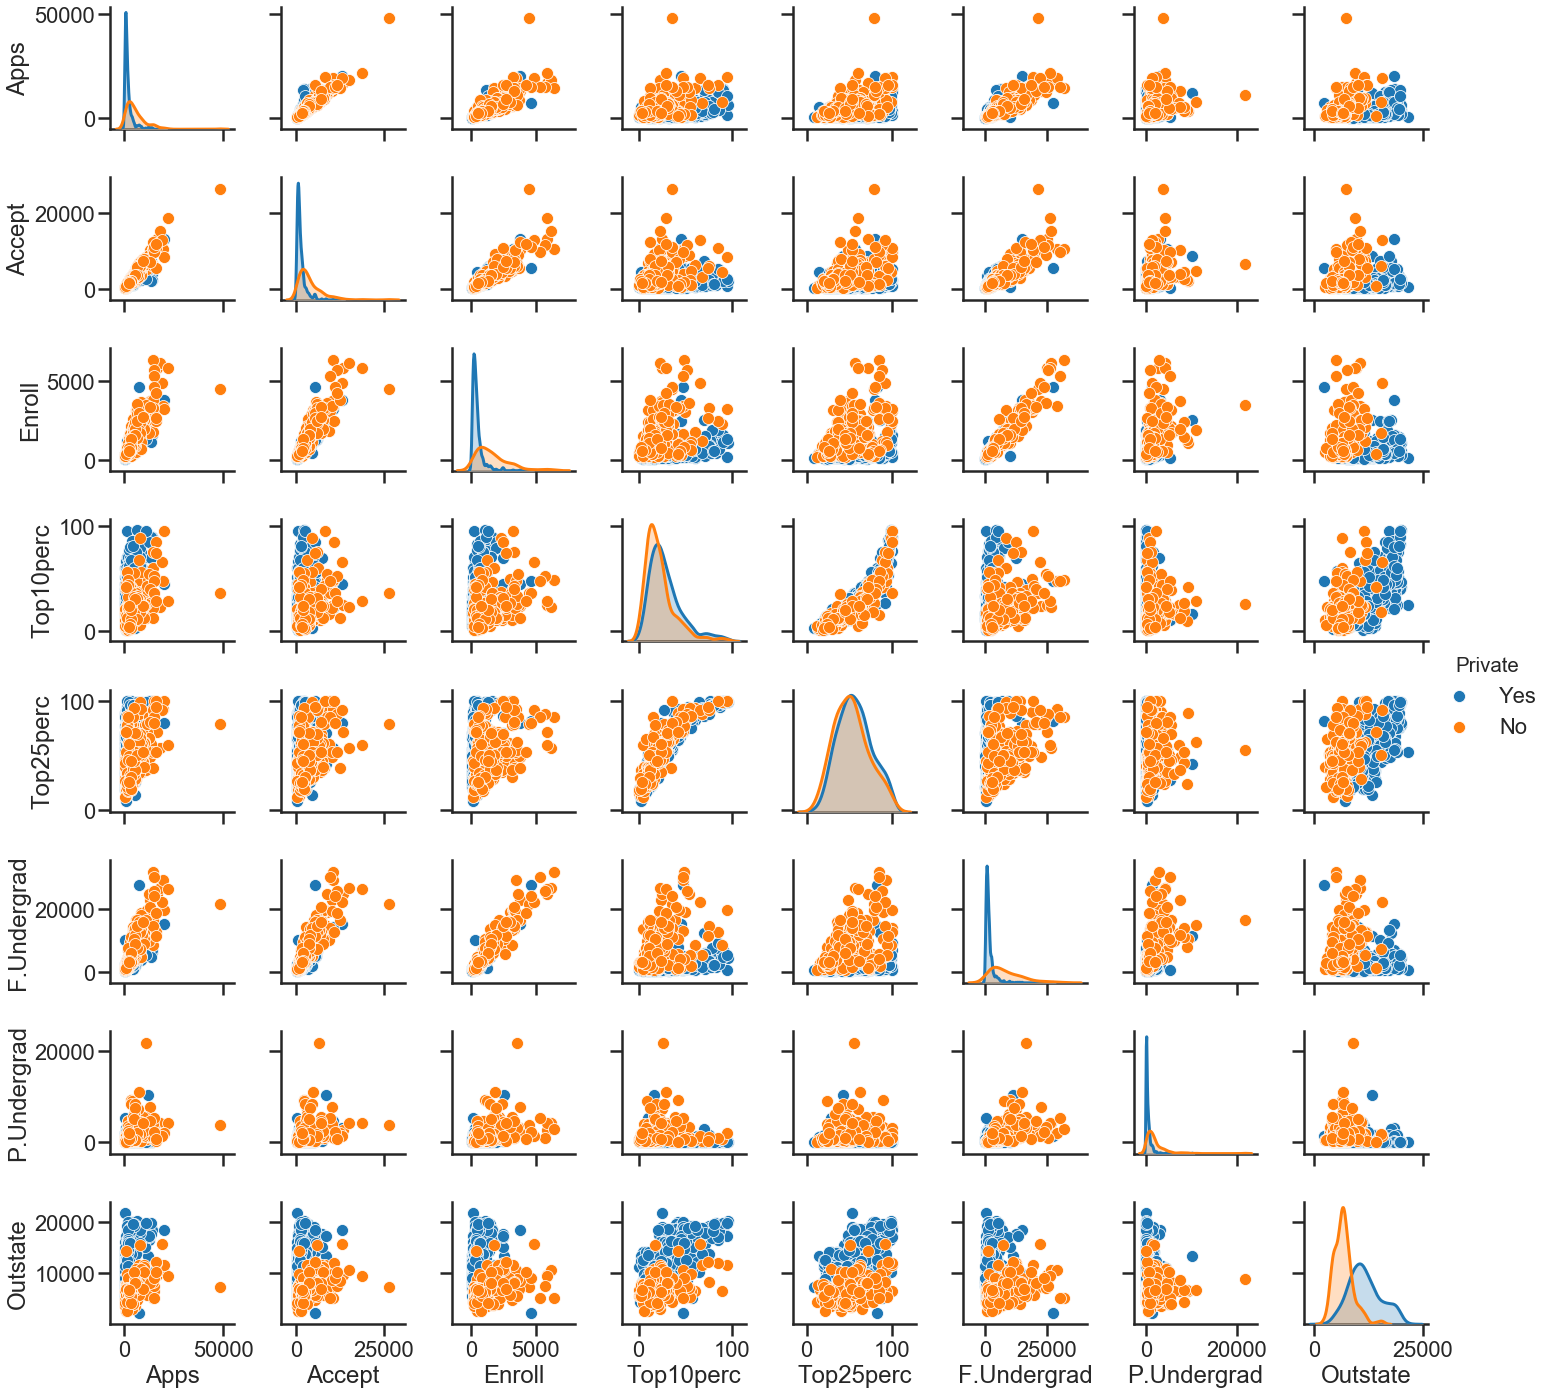

In [112]:
sns.pairplot(data_college.iloc[:,0:10], hue='Private')

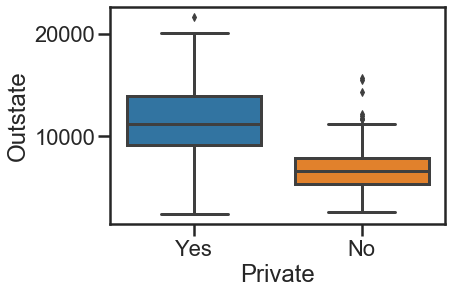

In [61]:
sns.boxplot(x='Private', y='Outstate', data=data_college)

In [62]:
data_college['Elite'] = ['Yes' if row > 50 else 'No' for row in data_college['Top10perc']]
data_college['Elite'].value_counts()

No     699
Yes    78 
Name: Elite, dtype: int64

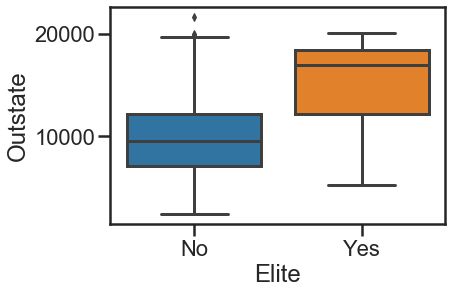

In [63]:
sns.boxplot(x='Elite', y='Outstate', data=data_college)

In [69]:
path = 'C:/Users/Schindler/Downloads/auto.csv'
data_auto = pd.read_csv(path)
data_auto = pd.DataFrame(data_auto)
print(data_auto.shape)
data_auto.head()

(397, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [70]:
data_auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [71]:
data_auto.dtypes.value_counts()

int64      4
float64    3
object     2
dtype: int64

In [72]:
data_auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [73]:
data_auto_1 = data_auto.drop([10,85])
data_auto_1.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,23.564051,5.445570,192.656962,2965.901266,15.576203,76.017722,1.577215
std,7.815819,1.696203,103.905655,847.608812,2.739621,3.683850,0.803537
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,102.500000,2221.500000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2795.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,261.000000,3607.000000,17.150000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


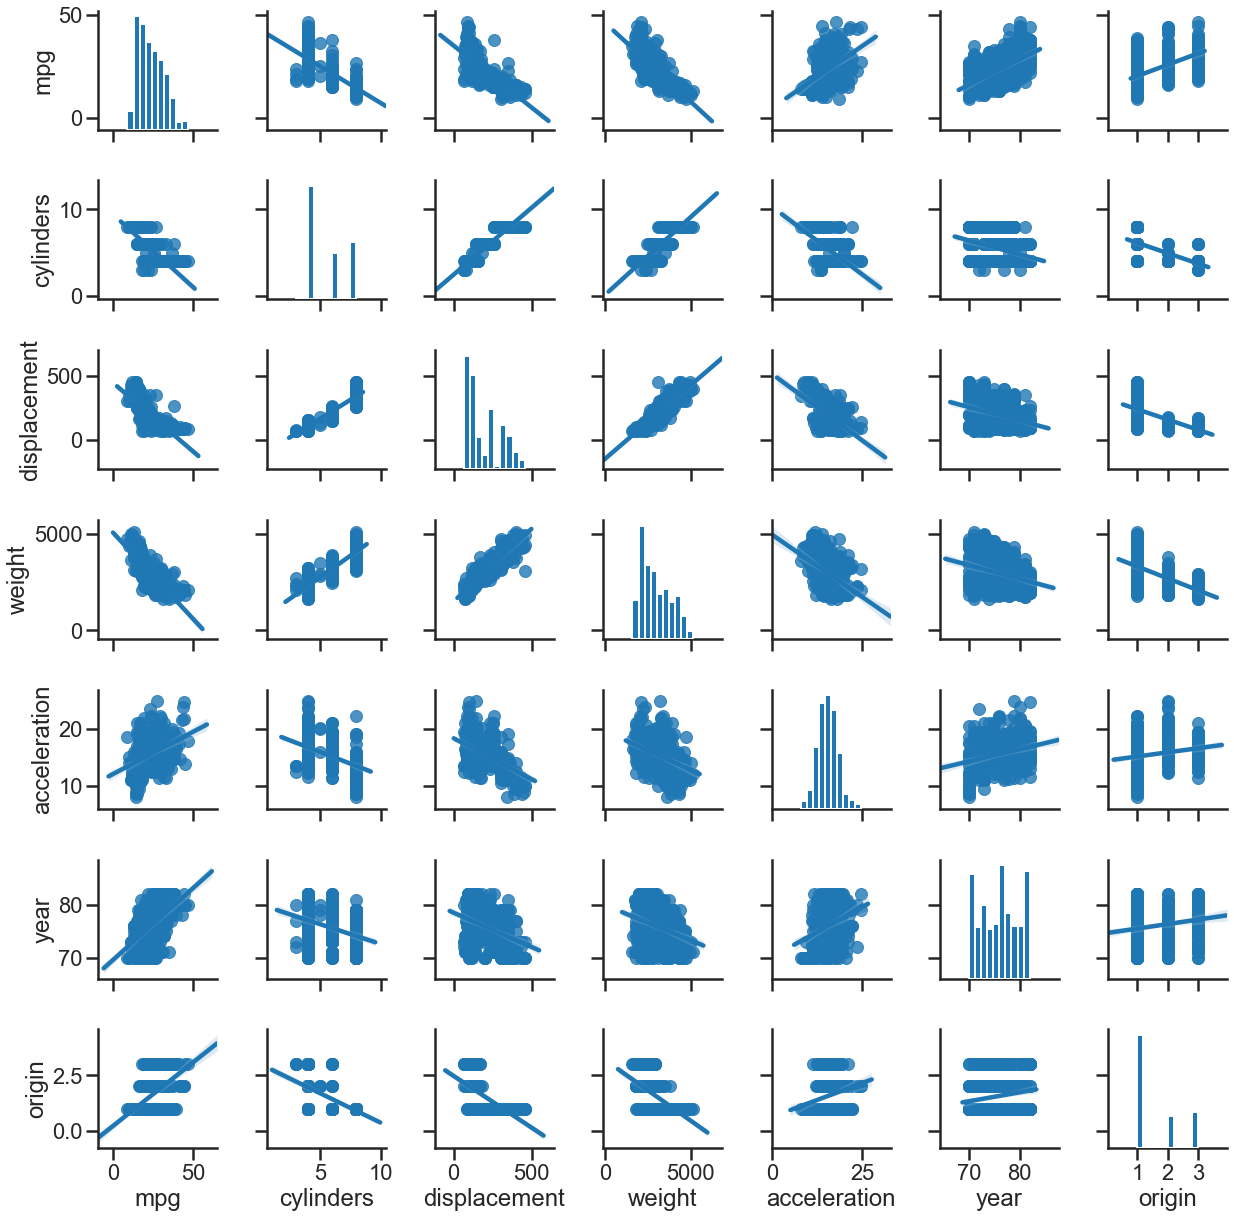

In [76]:
sns.pairplot(data_auto, kind='reg')

In [78]:
data_auto.corr()['mpg']

mpg             1.000000
cylinders      -0.776260
displacement   -0.804443
weight         -0.831739
acceleration    0.422297
year            0.581469
origin          0.563698
Name: mpg, dtype: float64

In [85]:
path = 'C:/Users/Schindler/Downloads/Boston.csv'
data_Boston = pd.read_csv(path)
data_Boston = pd.DataFrame(data_Boston)
print(data_Boston.shape)
data_Boston.drop('Unnamed: 0', axis=1, inplace=True)
data_Boston.head()

(506, 15)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [87]:
data_Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [88]:
data_Boston.corr()['crim']

crim       1.000000
zn        -0.200469
indus      0.406583
chas      -0.055892
nox        0.420972
rm        -0.219247
age        0.352734
dis       -0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
black     -0.385064
lstat      0.455621
medv      -0.388305
Name: crim, dtype: float64

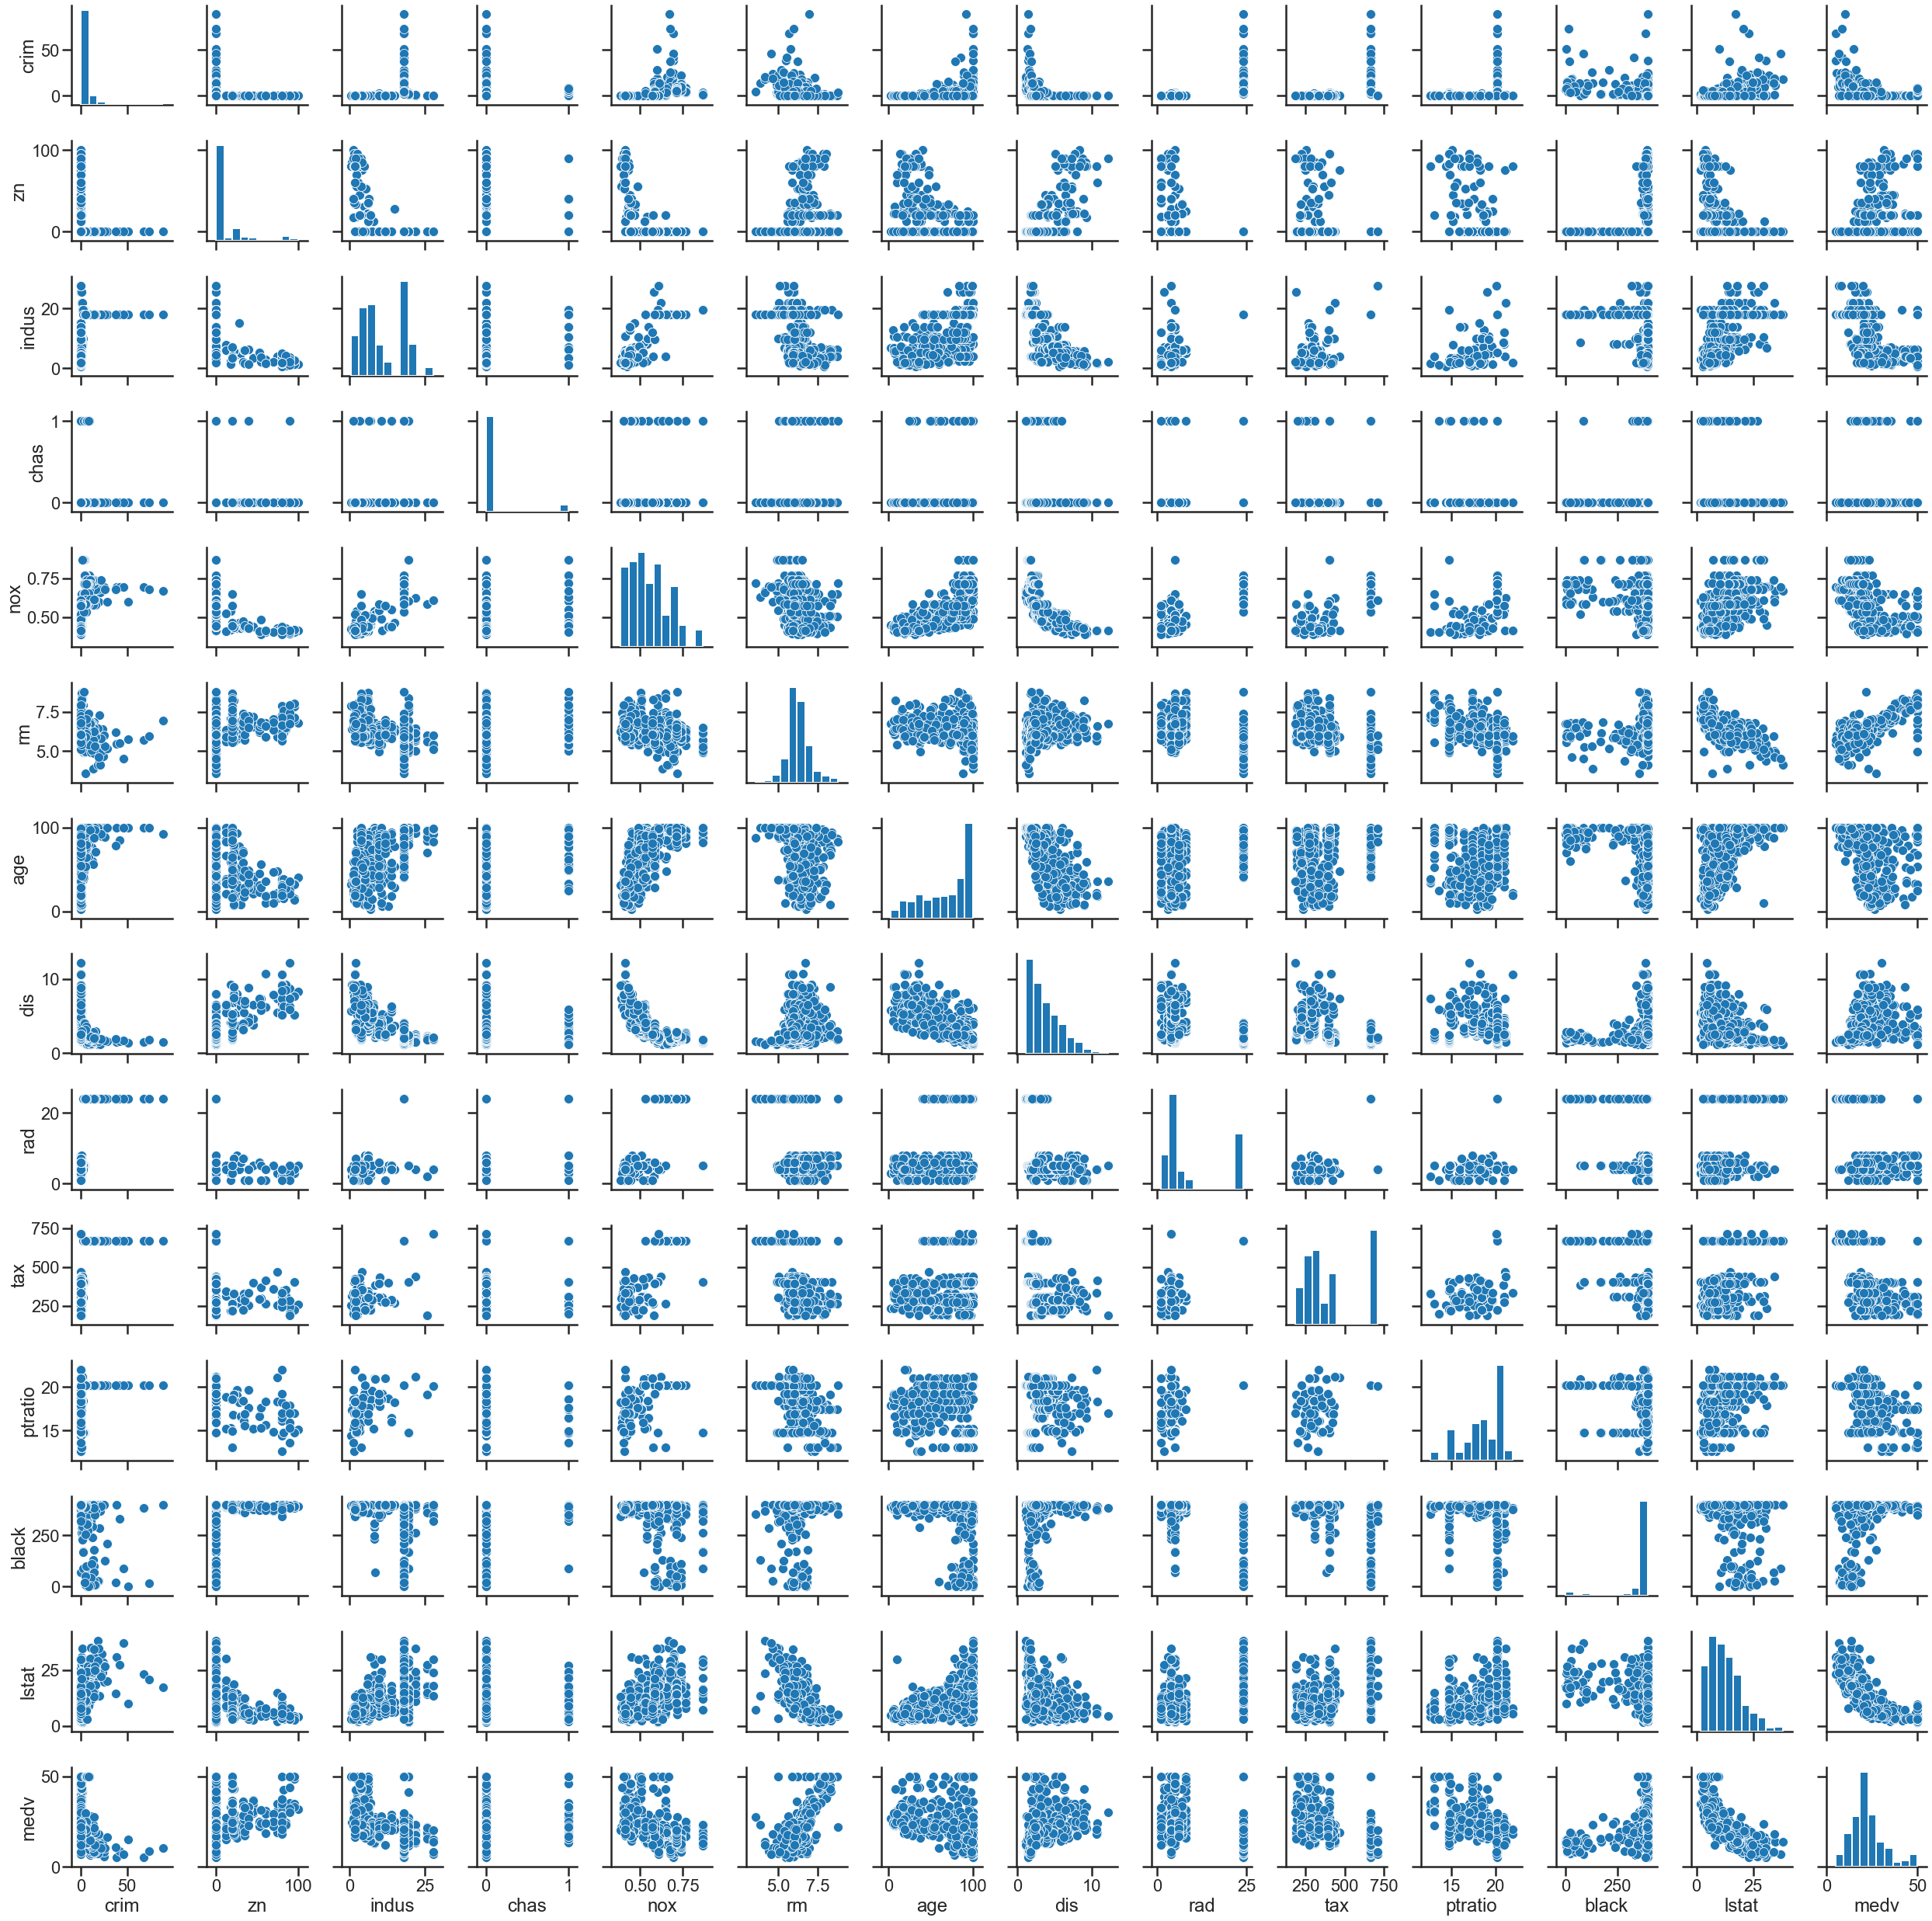

In [86]:
sns.pairplot(data_Boston)

In [96]:
data_Boston.head()
print('7: ', data_Boston[data_Boston['rm'] > 7].shape)
print('8: ', data_Boston[data_Boston['rm'] > 8].shape)

7:  (64, 14)
8:  (13, 14)
